In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.optimize import curve_fit

## Reading the  data

In [2]:
assay = pd.read_csv("./data/assay_results.csv")
labels = pd.read_csv("./data/compound_labels.csv")
ic50 = pd.read_csv("./data/compound_ic50.csv")

## Data exploration

In [3]:
assay.columns


Index(['Compound ID', 'Concentration (M)', '% Inhibition'], dtype='object')

In [4]:
labels.columns

Index(['Compound ID', ' Assay Result Label'], dtype='object')

In [5]:
ic50.columns

Index(['Compound ID', ' IC50 (M)'], dtype='object')

In [6]:
assay.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9840 entries, 0 to 9839
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Compound ID        9840 non-null   int64  
 1   Concentration (M)  9840 non-null   float64
 2   % Inhibition       9840 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 230.8 KB


In [7]:
assay.describe

<bound method NDFrame.describe of       Compound ID  Concentration (M)  % Inhibition
0               1             0.0001      0.028091
1               1             0.0002      0.306951
2               1             0.0004      3.263726
3               1             0.0006     12.039529
4               1             0.0008     26.991113
...           ...                ...           ...
9835         1075             0.0100      0.000000
9836         1075             0.0200      0.000000
9837         1075             0.0300      0.000000
9838         1075             0.0400      0.000000
9839         1075             0.0500      0.000000

[9840 rows x 3 columns]>

In [8]:
compound  = assay[assay['Compound ID']==1]


In [9]:
plt.figure(figsize=(16, 10))

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<AxesSubplot:xlabel='Concentration (M)', ylabel='% Inhibition'>

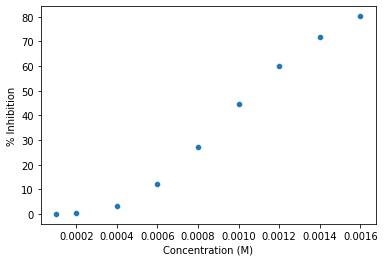

In [10]:
sns.scatterplot(x='Concentration (M)', y="% Inhibition", data=compound)

In [11]:
assay_result_label = labels[' Assay Result Label'].unique()

In [12]:
print(assay_result_label)

['Fragment hit' 'Candidate' 'Probe' 'Starting point'
 'Invalid concentration range' 'Inactive']


## Merging datasets using the primary key ID

In [13]:


df = pd.merge(assay, labels, on="Compound ID")
#df = pd.merge(df, ic50, on="Compound ID")

In [14]:
df.head()

,Compound ID,Concentration (M),% Inhibition,Assay Result Label
0,1,0.0001,0.028091,Fragment hit
1,1,0.0002,0.306951,Fragment hit
2,1,0.0004,3.263726,Fragment hit
3,1,0.0006,12.039529,Fragment hit
4,1,0.0008,26.991113,Fragment hit


In [15]:
df.columns = ['ID', 'Concentration', 'Inhibition',
       'Label']
    

In [16]:
df.head()

,ID,Concentration,Inhibition,Label
0,1,0.0001,0.028091,Fragment hit
1,1,0.0002,0.306951,Fragment hit
2,1,0.0004,3.263726,Fragment hit
3,1,0.0006,12.039529,Fragment hit
4,1,0.0008,26.991113,Fragment hit


## visualizing some data

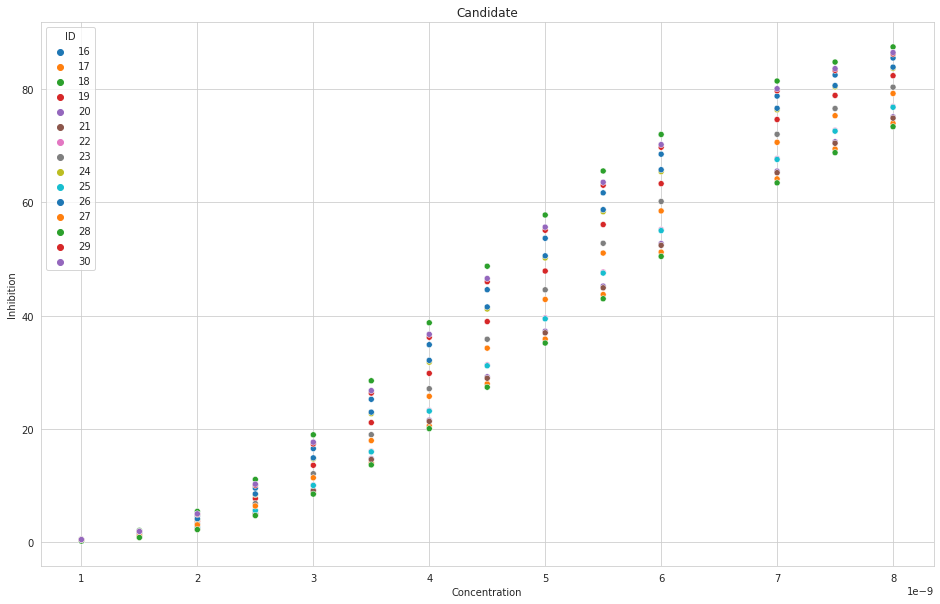

In [17]:
toplot='Candidate'
sub_df = df[df['Label']==toplot]
ids =  sub_df['ID'].unique()
plt.figure(figsize=(16, 10))
sns.set_style('whitegrid')
sns.scatterplot(x='Concentration', y="Inhibition", data=sub_df,hue='ID', palette='tab10').set(title=toplot)
plt.show()

In [18]:
sub_df

,ID,Concentration,Inhibition,Label
135,16,1.000000e-09,0.443526,Candidate
136,16,1.500000e-09,1.775283,Candidate
137,16,2.000000e-09,4.654470,Candidate
138,16,2.500000e-09,9.543844,Candidate
139,16,3.000000e-09,16.530797,Candidate
...,...,...,...,...
340,30,5.500000e-09,63.506132,Candidate
341,30,6.000000e-09,70.151421,Candidate
342,30,7.000000e-09,80.010271,Candidate
343,30,7.500000e-09,83.551506,Candidate


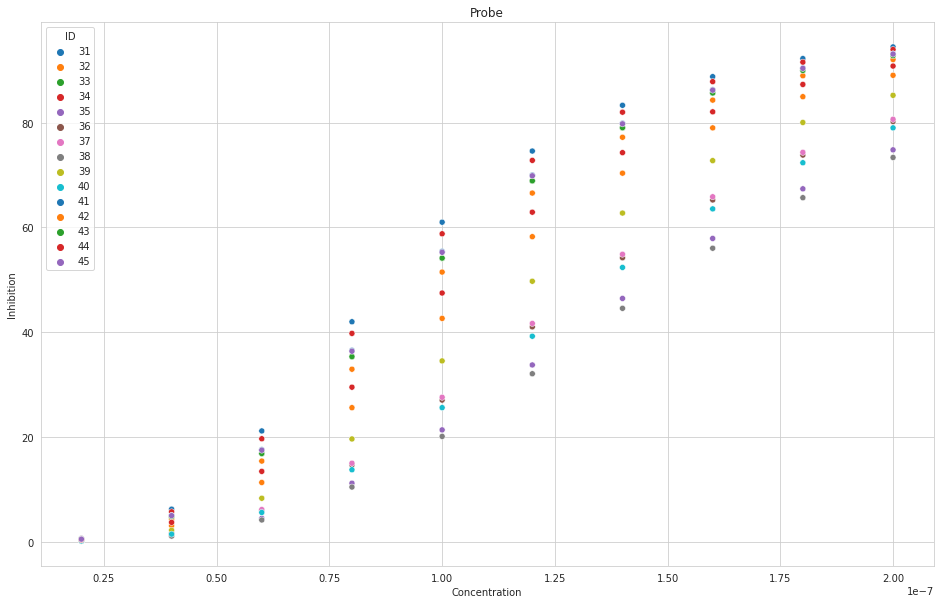

In [19]:
toplot='Probe'
sub_df = df[df['Label']==toplot]
ids =  sub_df['ID'].unique()
plt.figure(figsize=(16, 10))
sns.set_style('whitegrid')
sns.scatterplot(x='Concentration', y="Inhibition", data=sub_df,hue='ID', palette='tab10').set(title=toplot)
plt.show()

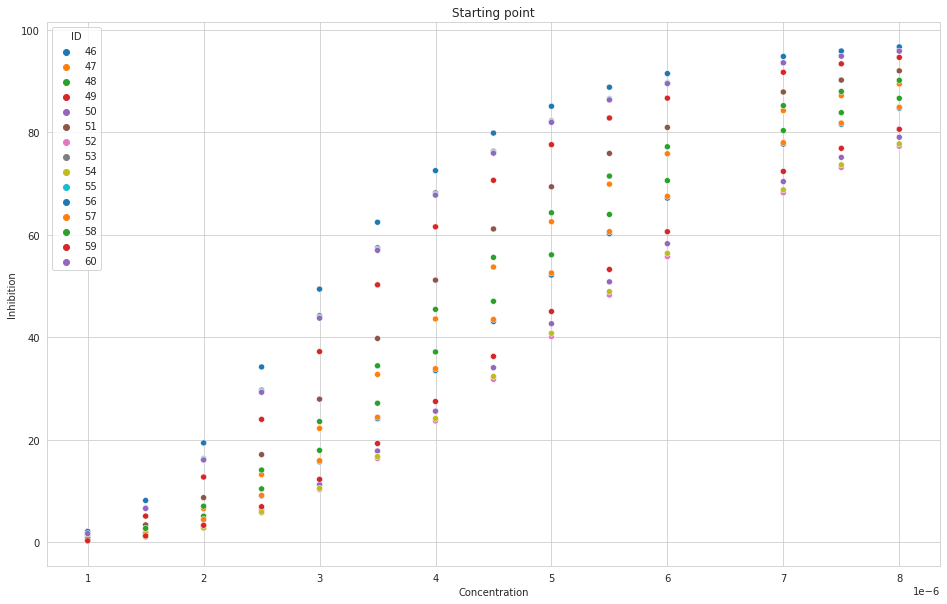

In [20]:
toplot='Starting point'
sub_df = df[df['Label']==toplot]
ids =  sub_df['ID'].unique()
plt.figure(figsize=(16, 10))
sns.set_style('whitegrid')
sns.scatterplot(x='Concentration', y="Inhibition", data=sub_df,hue='ID', palette='tab10').set(title=toplot)
plt.show()

## Fitting functions

In [21]:
def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0)))+b
    return y

def exp_func(x, a, b):
    return a * np.exp(b * x)

def expo_func(x,a,b):
    return np.exp(a * (x - b))
def exp_func1(x, b):
    return np.exp(b * x)


def Hill_sigmoidal_func(x, a, b, c):  # Hill sigmoidal equation 
    return a * np.power(x, b) / (np.power(c, b) + np.power(x, b))


def func1(x, a, b, c, d):
    return d + ((a - d) / (1 + (x / c) ** b))


def func2(x, a, b, c):
    return a / (1 + np.exp(-b * (x - c)))


def sigmoidal_func(x, a, b, c):
    return a / (1 + np.exp(-c * (x - b)))




## Attempt to fit the data

## using sigmoidal function

[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30]
[76.86969099327565, 4.25e-09, 1, 0.2519508330858598]
[32.14208007  7.24782715 -7.07461524]


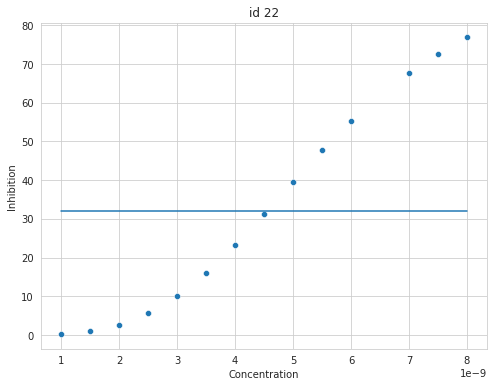

In [22]:
toplot='Candidate'
id_=22

sub_df = df[df['Label']==toplot]
print(sub_df['ID'].unique())
compound_df = sub_df[sub_df['ID']==id_]
ydata=np.asarray(compound_df["Inhibition"])
xdata=np.asarray(compound_df["Concentration"])
p0 = [max(ydata), np.median(xdata),1,min(ydata)] # this is an mandatory initial guess
print(p0)
popt, pcov = curve_fit(sigmoidal_func, xdata, ydata, method='dogbox', maxfev=15000)
print(popt)
x = np.linspace(xdata.min(), xdata.max(),1000)
yModel_fit=sigmoidal_func(x, *popt)

fit = pd.DataFrame({'x': x,
                              'y': yModel_fit,
                              })
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
sns.scatterplot(x='Concentration', y="Inhibition", data=compound_df, palette='tab10').set(title='id '+str(id_))
sns.lineplot(x='x', y='y', data=fit,palette='tab10')
plt.show()

## using exp function

[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30]
[85.42600284902869, 1]
[9.99173331e+00 2.86158513e+08]


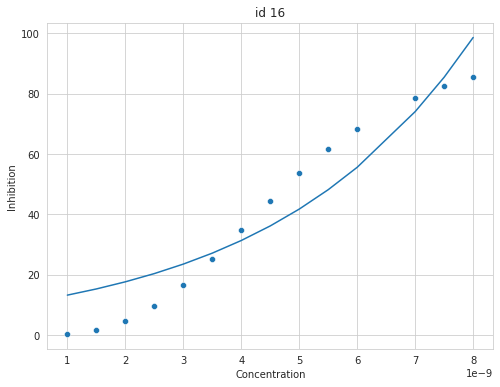

In [23]:
toplot='Candidate'
id_=16

sub_df = df[df['Label']==toplot]
print(sub_df['ID'].unique())
compound_df = sub_df[sub_df['ID']==id_]
ydata=np.asarray(compound_df["Inhibition"])
xdata=np.asarray(compound_df["Concentration"])
p0 = [max(ydata),1] # this is an mandatory initial guess
print(p0)
popt, pcov = curve_fit(exp_func, xdata, ydata,p0, method='dogbox', maxfev=15000)
print(popt)
yModel_fit=exp_func(xdata, *popt)

fit = pd.DataFrame({'x': xdata,
                              'y': yModel_fit,
                              })
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
sns.scatterplot(x='Concentration', y="Inhibition", data=compound_df, palette='tab10').set(title='id '+str(id_))
sns.lineplot(x='x', y='y', data=fit,palette='tab10')
plt.show()

In [24]:
df_target = df['Inhibition']
df_final = df.drop(columns = ['Inhibition','Label','ID'])




X = np.array(df_final).astype('float32')
y = np.array(df_target).astype('float32')
y = y.reshape(-1,1)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5)

# Train an XGBoost regressor model 

import xgboost as xgb



model = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.1, max_depth = 5, n_estimators = 100)

model.fit(X_train, y_train)
model.fit(X_train, y_train)
result = model.score(X_test, y_test)

print("Accuracy : {}".format(result))
y_predict = model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

Accuracy : 0.6064943158449297
RMSE = 10.641 
MSE = 113.22681 
MAE = 2.9029415 
R2 = 0.6064943158449297 
Adjusted R2 = 0.6059596613827626


fitting data 

[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30]


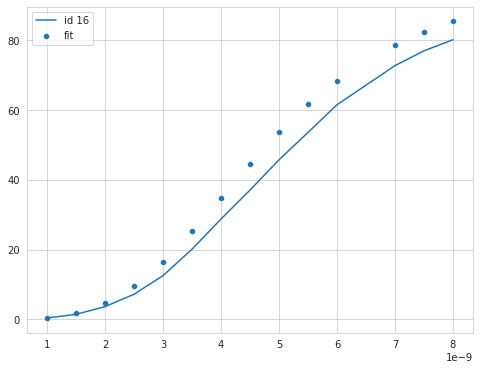

In [25]:
toplot='Candidate'
id_=16

sub_df = df[df['Label']==toplot]
print(sub_df['ID'].unique())
compound_df = sub_df[sub_df['ID']==id_]
ydata=np.asarray(compound_df["Inhibition"])
xdata=np.asarray(compound_df["Concentration"])
y_predict = model.predict(xdata)
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
#sns.scatterplot(x='Concentration', y="Inhibition", data=compound_df, palette='tab10').set(title='id '+str(id_))
sns.scatterplot(x=xdata, y=ydata,palette='tab10')
sns.lineplot(x=xdata, y=y_predict,palette='tab10')
plt.legend(labels=["id "+str(id_),"fit"])
plt.show()

[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30]


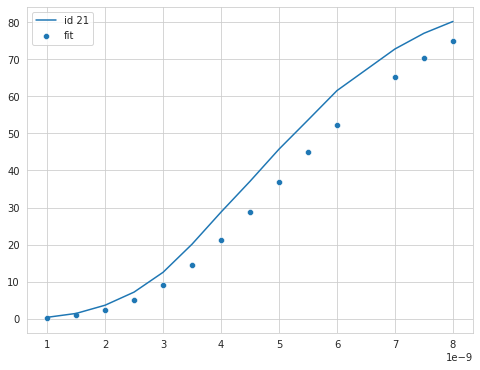

In [26]:
toplot='Candidate'
id_=21

sub_df = df[df['Label']==toplot]
print(sub_df['ID'].unique())
compound_df = sub_df[sub_df['ID']==id_]
ydata=np.asarray(compound_df["Inhibition"])
xdata=np.asarray(compound_df["Concentration"])
y_predict = model.predict(xdata)
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
#sns.scatterplot(x='Concentration', y="Inhibition", data=compound_df, palette='tab10').set(title='id '+str(id_))
sns.scatterplot(x=xdata, y=ydata,palette='tab10')
sns.lineplot(x=xdata, y=y_predict,palette='tab10')
plt.legend(labels=["id "+str(id_),"fit"])
plt.show()